___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://p0.pikrepo.com/preview/226/186/artificial-intelligence-concept.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://p0.pikrepo.com/preview/226/186/artificial-intelligence-concept.jpg.</p>

### <font color= #2E9AFE> Tema: Procesamiento de Datos</font>

#### Datos: Glass Identification Data Set
Los datos se pueden encontrar en:
https://archive.ics.uci.edu/ml/datasets/glass+identification

Se busca identificar qué tipo de vidrio es una muestra. 


- 1. Id number: 1 a 214
- 2. RI: Indice Refractivo(medida para saber cuánto se reduce la velocidad de la luz al atravesarlo)
- 3. Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, como son los atributos 4-10)
- 4. Mg: Magnesio
- 5. Al: Aluminio
- 6. Si: Silicon
- 7. K: Potasio
- 8. Ca: Calcio
- 9. Ba: Bario
- 10. Fe: Hierro
- 11. Tipo de Vidrio: 
-- 1 ventanas de edificios procesadas por flotación 
-- 2 ventanas de edificios no procesadas por flotación 
-- 3 ventanas de vehículos procesadas por flotación
-- 4 ventanas de vehículos no procesadas por flotación 
-- 5 contenedores
-- 6 vajilla
-- 7 faros

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="350px" height="180px" />



### Librerías


Las librerías son un conjunto de módulos y paquetes donde muchas de las operaciones más comúnes de la programación diaria ya están implementadas en ellas, de modo que podemos concentrarnos en lo que realmente nos ocupa. 

In [1]:
#Importar Librerías
import numpy as np #para trabajar con arreglos numéricos
import pandas as pd #para trabajar con dataframes
import matplotlib.pyplot as plt #visualizaciones
import seaborn as sns #visualizaciones
from sklearn import preprocessing #librería de machine learning en python

Más información sobre qué es una librería:

https://immune.institute/blog/librerias-python-que-son/

In [2]:
#Importar datos

#los archivos ".data" los podemos leer con la función read_csv pero es necesario decirle cómo se llaman nuestras variables
data = pd.read_csv('glass.data',header=None)
names = ['ID','Indice_Refraccion','Na','Mg','Al','Si','K', 'Ca','Ba','Fe','Tipo_Vidrio']
data.columns = names

Al leer archivos `.data` es necesario especificar los nombres de las columnas

In [3]:
#¿Qué es data?
type(data)

pandas.core.frame.DataFrame

In [4]:
#Dimension de los datos
data.shape

(214, 11)

In [5]:
#Vistazo de datos
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
#Tipo de cada dato
data.dtypes

ID                     int64
Indice_Refraccion    float64
Na                   float64
Mg                   float64
Al                   float64
Si                   float64
K                    float64
Ca                   float64
Ba                   float64
Fe                   float64
Tipo_Vidrio            int64
dtype: object

In [7]:
#Tipos de datos
dtypes = pd.DataFrame(data.dtypes, columns=['Tipo'])
dtypes

,Tipo
ID,int64
Indice_Refraccion,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64


In [8]:
#valores nulos de una columna
data.iloc[:,3].isnull().sum()

0

In [9]:
#Valores nulos
missing = pd.DataFrame(data.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
ID,0
Indice_Refraccion,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


Todo bien! no hay valores nulos

In [10]:
#valores unicos de una columna
data.iloc[:,3].nunique()

94

In [11]:
#valores únicos
unival = pd.DataFrame(data.nunique(), columns=['Valores_Unicos'])
unival

,Valores_Unicos
ID,214
Indice_Refraccion,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


In [12]:
data.Tipo_Vidrio.unique()

array([1, 2, 3, 5, 6, 7])

In [13]:
#Detalles estadísticos
data.describe(include='all')

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
#Visualizar todo junto
def reporte(datos):
    dtyp = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(data.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(data.max(), columns=['Max'])
    minimo = pd.DataFrame(data.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)
reporte(data)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
ID,int64,0,214,214.00000,1.00000
Indice_Refraccion,float64,0,178,1.53393,1.51115
Na,float64,0,142,17.38000,10.73000
Mg,float64,0,94,4.49000,0.00000
Al,float64,0,118,3.50000,0.29000
Si,float64,0,133,75.41000,69.81000
K,float64,0,65,6.21000,0.00000
Ca,float64,0,143,16.19000,5.43000
Ba,float64,0,34,3.15000,0.00000
Fe,float64,0,32,0.51000,0.00000


¿En verdad son todas las variables numéricas?
<font color= #8A0829> NO </font>

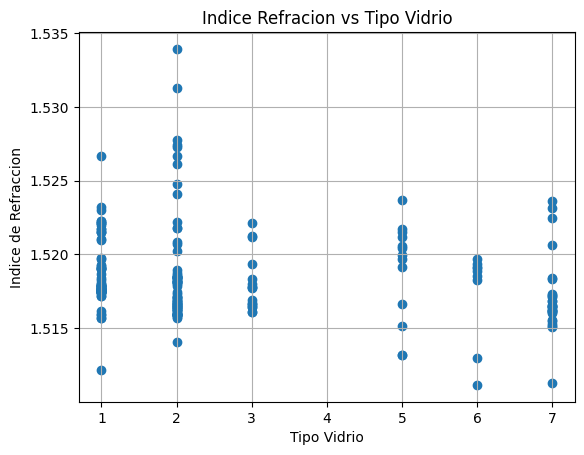

In [15]:
#Graficar variables
plt.scatter(data.Tipo_Vidrio, data.Indice_Refraccion)
plt.xlabel('Tipo Vidrio'),plt.ylabel('Indice de Refraccion')
plt.title("Indice Refracion vs Tipo Vidrio")
plt.grid()
plt.show()

In [16]:
#cuántos datos hay de cada tipo de vidrio
data.Tipo_Vidrio.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Tipo_Vidrio, dtype: int64

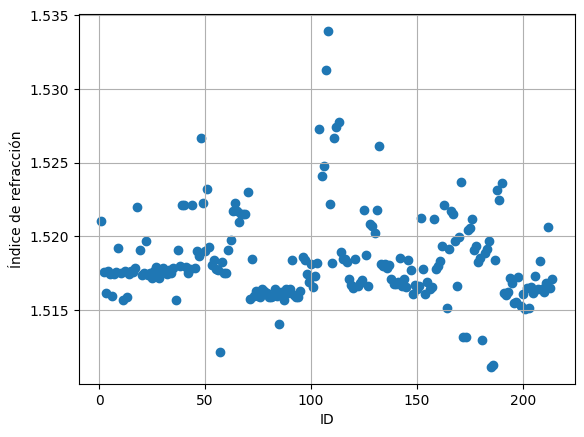

In [17]:
#Graficar una sola variable
plt.scatter(data.ID, data.Indice_Refraccion)
plt.xlabel('ID'),plt.ylabel('Índice de refracción')
plt.grid()
plt.show()

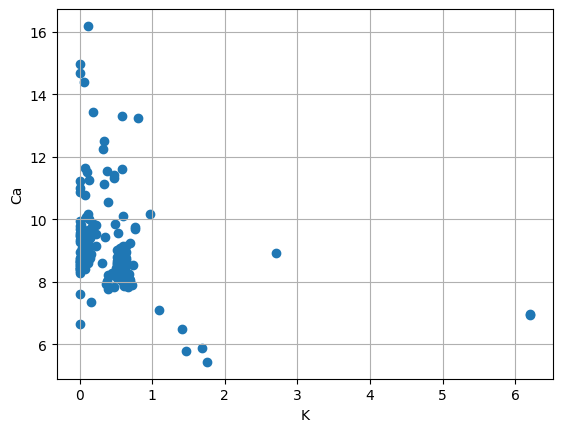

In [18]:
#Graficar una varible con otra
plt.scatter(data.K,data.Ca)
plt.xlabel('K'),plt.ylabel('Ca')
plt.grid()
plt.show()

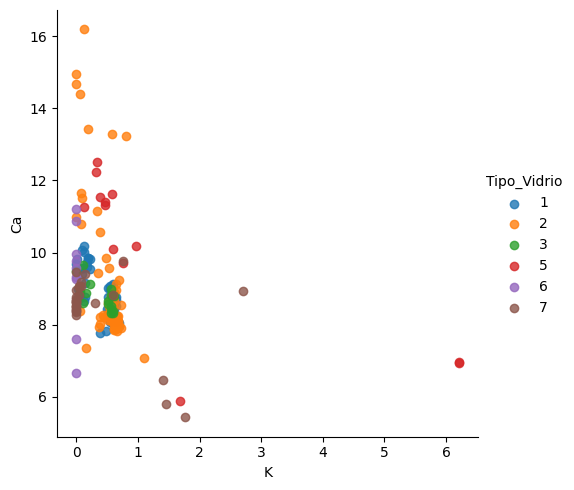

In [19]:
#Graficar una varible con otra y colorear por tipo de vidrio
sns.lmplot(x='K', y='Ca', data=data, hue='Tipo_Vidrio', fit_reg=False)

### Centrado y Escalamiento
*¿Qué es?*: Es poner valores en el mismo rango o escala para que ninguna variable sea dominada por otra

*¿Porqué sirve?*: La mayoría de las veces, los datos tienen variables que varían mucho en magnitudes, unidades y rango. Pero dado que la mayoría de los algoritmos de aprendizaje automático utilizan la distancia euclidiana entre dos puntos de datos en sus cálculos, esto es un problema.

Las variables con magnitudes altas pesarán mucho más en los cálculos de distancia que las variables con magnitudes bajas. Para que esto no afecte tanto, debemos llevar todas las variables al mismo nivel de magnitudes. Esto se puede lograr escalando.
<br>

Algunos algoritmos donde el escalamiento importa:
- KNN: con la ditancia Euclidiana es sensible a magnitudes
- PCA: este busca traer características con máxima varianza y la varianza es grande para variables con grandes magnitudes. Esto sesga el PCA a variables con grandes magnitudes 
- Gradiente Descendiente: se puede acelerar escalando. Ya que $\theta$ desciende más rápido en rangos pequeños y eso hace que oscile menos ya que los brincos son más parejos

 <br>
 
<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/2000/1*yR54MSI1jjnf2QeGtt57PA.png" width="350px" height="180px" />
<br>
Observando los datos originales, vemos que cada variable tiene diferentes escalas.

In [20]:
#Datos originales
data.head(10)

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


**Escalar datos**

*Estandarización*

La ecuación para estandarizar datos (MinMaxScaler):

$$X\prime = \frac{X-X_{min}}{X_{max}-X_{min}}$$

Los valores quedan entre un rango específico como \[0,1\]. Trata de hacer que los valores sean cercanos a su media


In [21]:
# a mano para Indice de Refracción
(data.Indice_Refraccion - data.Indice_Refraccion.min()) / (data.Indice_Refraccion.max() - data.Indice_Refraccion.min())

0      0.432836
1      0.283582
2      0.220808
3      0.285777
4      0.275241
         ...   
209    0.223003
210    0.250219
211    0.417032
212    0.235294
213    0.261633
Name: Indice_Refraccion, Length: 214, dtype: float64

In [22]:
#con librería
scaler = preprocessing.MinMaxScaler()
names = data.columns[1:11]
scaler_1 = scaler.fit_transform(data.iloc[:,1:11])
scaled_df = pd.DataFrame(scaler_1, columns=names)
scaled_df.head()

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,0.0


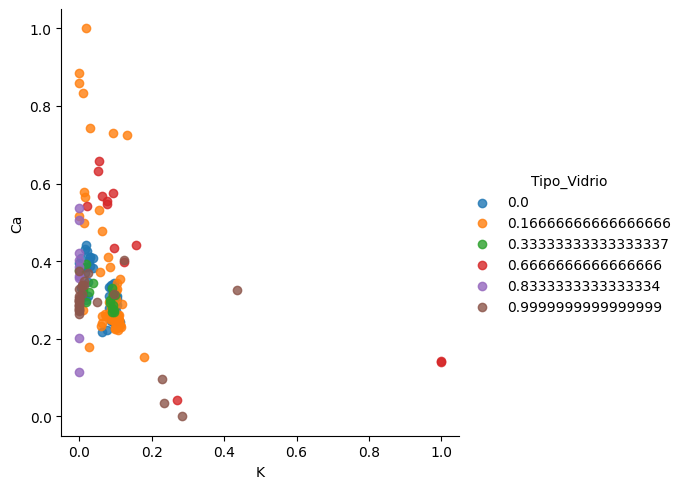

In [23]:
#Graficar nuevas variables
sns.lmplot(x='K', y='Ca', data=scaled_df, hue='Tipo_Vidrio', fit_reg=False)

<ipython-input-24-fcc1c3bf6d9d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Ca, ax=ax[0], color='y')
<ipython-input-24-fcc1c3bf6d9d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_df.Ca, ax=ax[1])


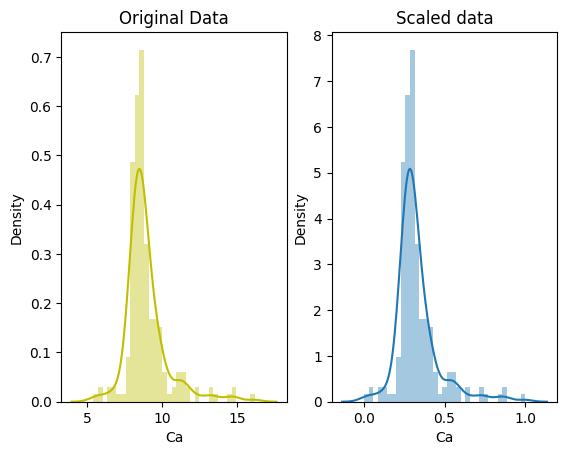

In [24]:
# Graficamos variable original (Ca) vs variable escalada por minmax
fig, ax=plt.subplots(1,2)
sns.distplot(data.Ca, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_df.Ca, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()
#La distribución no cambia

*Normalización*

La ecuación para escalar las variables por normalización (z-score normalization):

$$x\prime=\frac{x-\bar x}{\sigma}$$

Transforma los datos tal que la distribución resultante tiene media de 0 y desviación estándar de 1.
Cuando hay datos atípicos que son importantes y no queremos perder su impacto, usamos esta normalización. Aquí sí se obtienen datos negativos

In [25]:
#a mano para indice de refracción normalizacion
(data.Indice_Refraccion - data.Indice_Refraccion.mean())/(data.Indice_Refraccion.std())

0      0.870826
1     -0.248750
2     -0.719631
3     -0.232286
4     -0.311315
         ...   
209   -0.703166
210   -0.499008
211    0.752282
212   -0.610966
213   -0.413394
Name: Indice_Refraccion, Length: 214, dtype: float64

In [26]:
#con librería
names = data.columns
d = preprocessing.scale(data)
standard = pd.DataFrame(d, columns=names)
standard.head()


,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,-0.848275
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,-0.848275
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,-0.848275
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,-0.848275
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,-0.848275


<ipython-input-27-9649acccc399>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Ca, ax=ax[0], color='y')
<ipython-input-27-9649acccc399>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(standard.Ca, ax=ax[1])


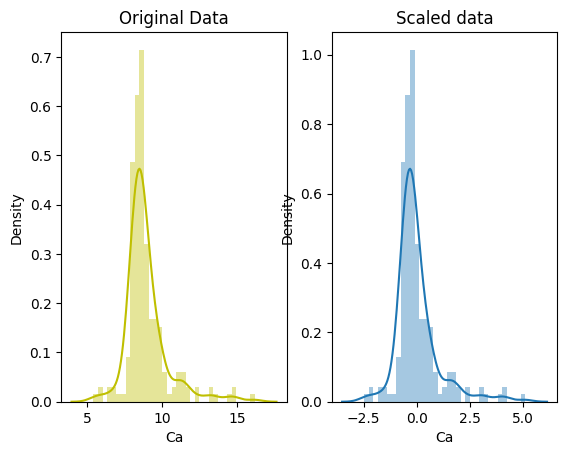

In [27]:
# Graficamos variable original (Ca) vs variable escalada por z-score
fig, ax=plt.subplots(1,2)
sns.distplot(data.Ca, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(standard.Ca, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

**Cuál es la diferencia entre estandarizar y normalizar?**

Escalar, está cambiando el rango de los datos mientras que en la normalización está cambiando la forma de distribución de los datos.

### Asimetría en los datos

La probabilidad de que los datos aparezcan por arriba de su media no es la misma que para valores por debajo de la media. 

Si estamos seguros que los datos son correctos, se puede realizar una transformación para evitar la asimetría

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/765/1*hxVvqttoCSkUT2_R1zA0Tg.gif" width="450px" height="280px" />

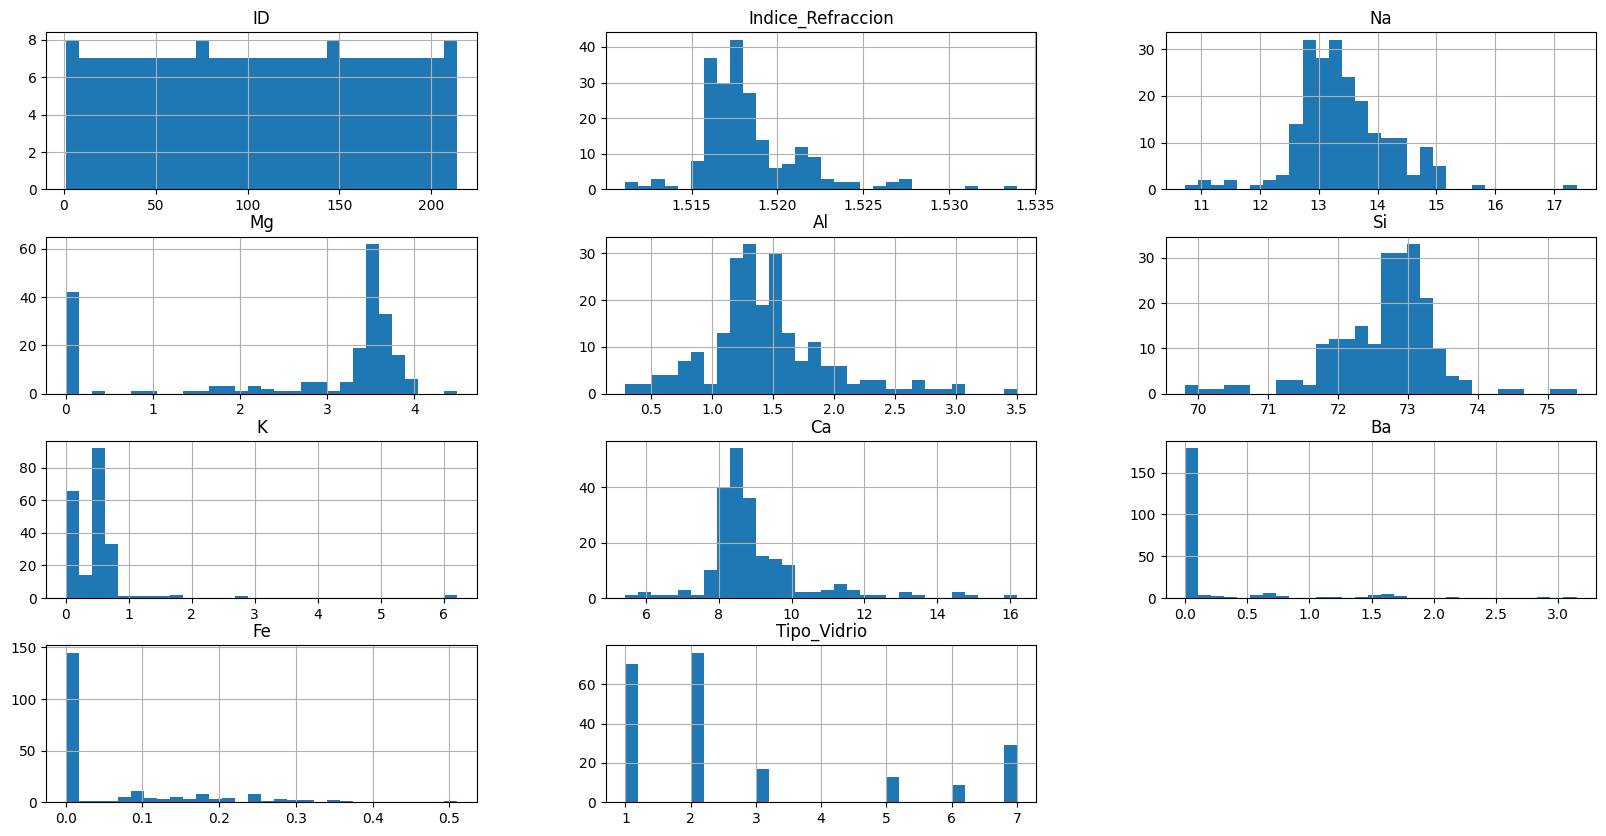

In [28]:
#Histogramas
data.hist(bins=30,figsize=(20,10))
plt.show()

#### Efectos de la asimetría
En datos asimétricos, la región de la cola puede actuar como un valor atípico para el modelo estadístico y sabemos que los valores atípicos afectan negativamente el rendimiento del modelo, especialmente los modelos basados en regresión. Hay modelos estadísticos que son robustos a valores atípicos como los modelos basados en árboles, pero limitarán la posibilidad de probar otros modelos. Por lo tanto, es necesario transformar los datos asimétricos para que se acerquen lo suficiente a una distribución gaussiana o distribución normal. Esto nos permitirá probar más modelos estadísticos.



Fórmula del índice de asimetría estática:
$$skewness = \frac{\sum_{i=1}^{m}(x_{i}-\bar x_{i})^{3}}{(m-1)v^{3/2}}, v=\frac{\sum_{i=1}^{n}(x_{i}-\bar x_{i})^{2}}{m-1} $$

Podemos determinar el nivel de asimetría de la forma:
- Distribución altamente sesgada: si el valor del sesgo es menor a -1 o mayor a +1.
- Distrubición moderadamente sesgada: si el valor del sesgo es entre -1 y -0.5 o entre +0.5 y +1
- Distribución aproximadamente simétrica: si el valor del sesgo está entre -0.5 y +0.5


In [29]:
#Sacar a mano la asimetría
def skewness(data):
    v = np.sum(np.power(data - data.mean(axis=0), 2)) / (data.shape[0] - 1)
    skewness = np.sum(np.power(data - data.mean(axis=0), 3)) / ((data.shape[0] - 1) * np.power(v, 3/2))
    return skewness

skewness(data)

ID                   0.000000
Indice_Refraccion    1.610240
Na                   0.449937
Mg                  -1.141788
Al                   0.898810
Si                  -0.723621
K                    6.490418
Ca                   2.027923
Ba                   3.384495
Fe                   1.737932
Tipo_Vidrio          1.104495
dtype: float64

In [30]:
# Calculo de la asimetria con pandas
skewness = round(data.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
ID,0.00,Symmetric distribution
Indice_Refraccion,1.63,Highly Skewed
Na,0.45,Symmetric distribution
Mg,-1.15,Highly Skewed
Al,0.91,Moderately skewed
Si,-0.73,Moderately skewed
K,6.55,Highly Skewed
Ca,2.05,Highly Skewed
Ba,3.42,Highly Skewed
Fe,1.75,Highly Skewed


##### ¿Cómo mitigar la asimetría?

_Box Cox_: Una transformación de Box Cox es una transformación de variables no normales en una forma normal. (Lambda entre -5 y 5). Aplicada a valores positivos. 

$$y(\lambda)=
    \begin{cases}
      \frac{(y)^{\lambda}-1}{\lambda} & \text{if $\lambda\neq0$}\\
      \log(y) & \text{if $\lambda=0$ }\\
     \end{cases}$$


**Datos con sesgo positivo**

_Transformación de raíz cúbica:_ Es una transformación bastante fuerte con un efecto sustancial en la forma de la distribución, pero es más débil que el logaritmo. También se puede aplicar a valores negativos y cero.
$$x_{i}^{*}=(x_{i})^{1/3}$$

_Transformación de raíz cuadrada:_ Aplicado solo a valores positivos. 
$$x_{i}^{*}=\sqrt(x_{i})$$

_Transformación logarítmica:_ Es una transformación fuerte que puede ser usada para reducir el sesgo positivo. Aplicado solo a valores positivos
$$x_{i}^{*}=\log(x_{i})$$

**Datos con sesgo negativo**

Las transformaciones comunes incluyen elevar al cuadrado, raíz cúbica y logarítmica.

_Transformación al cuadrado:_ Tiene un efecto moderado en la forma de la distribución y podría usarse para reducir el sesgo hacia la izquierda.
$$x_{i}^{*}=(x_{i})^{2}$$


Otro método para manejar la asimetría es encontrar valores atípicos y posiblemente eliminarlos.


In [31]:
# Varias transformaciones
data1=data.copy()
#Logarítmica
data1['Indice_Refraccion_no_skewness'] = np.log(data1.Indice_Refraccion)
#Elevar al cuadrado
data1['Indice_Refraccion_no_skewness'] = np.sqrt(data1.Indice_Refraccion)

## Transformacion BoxCox usando scipy
from scipy import stats
data1['Indice_Refraccion_no_skewness'] = stats.boxcox(data1.Indice_Refraccion,lmbda=-5)

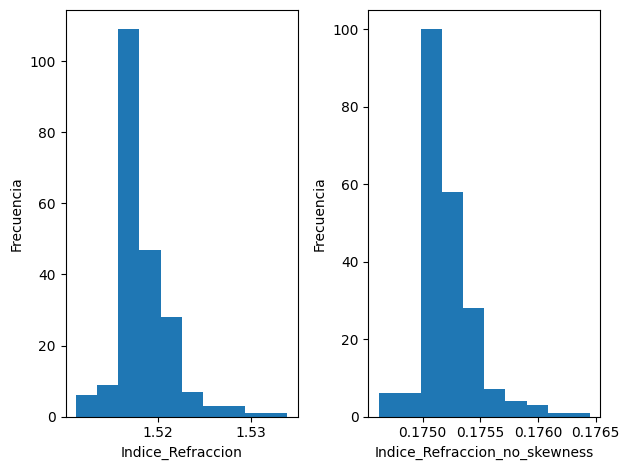

In [32]:
#Comparación de datos sesgados y transformados
fig = plt.figure()
plt.subplot(1,2,1)
plt.hist(data1.Indice_Refraccion)
plt.xlabel('Indice_Refraccion'),plt.ylabel('Frecuencia')
plt.subplot(1,2,2)
plt.hist(data1.Indice_Refraccion_no_skewness)
plt.xlabel('Indice_Refraccion_no_skewness'),plt.ylabel('Frecuencia')
fig.tight_layout()
plt.show()


In [33]:
#Sesgo para el índice de refracción transformado


### Valores Atípicos

Un dato se considera atípico si aparece por fuera de un rango que se considera válido o
aceptable para el fenómeno que se analiza.

Para determinar si los datos tienen valores atípicos es posible usar gráficas de bigotes en los
datos.

Para cuantificar el rango aceptable o permitido para encontrar datos atípicos se utiliza el
parámetro IQR (inter quantilerange).

$$IQR=75^{th}quantile - 25^{th}quantile$$
$$upper_{boundary}=75^{th}quantile+(\alpha*IQR)$$
$$lower_{boundary}=25^{th}quantile-(\alpha*IQR)$$

donde $\alpha$=1.5, y está relacionado a la probabilidad de ocurrencia si los datos tuvieran una distribución normal.

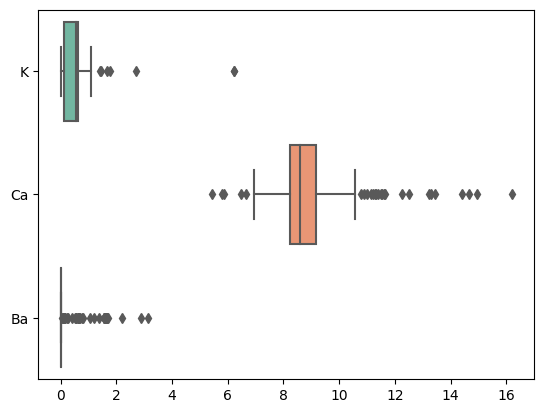

In [34]:
#Boxplot de varias las variables
ax = sns.boxplot(data=data.iloc[:,6:9], orient="h", palette="Set2")


<Axes: ylabel='Indice_Refraccion'>

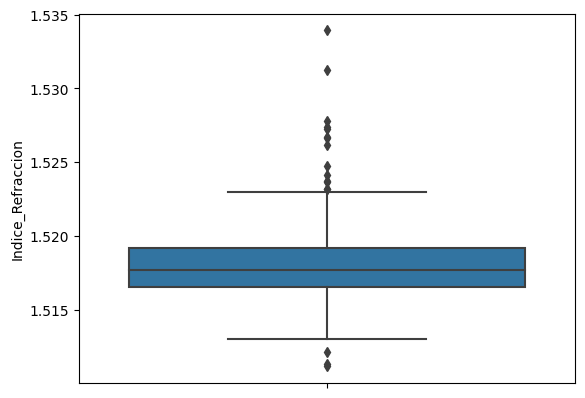

In [35]:
# Un boxplot no se ve afectado por el escalamiento
#Datos sin transformar
sns.boxplot(y=data['Indice_Refraccion'])

<Axes: ylabel='Indice_Refraccion'>

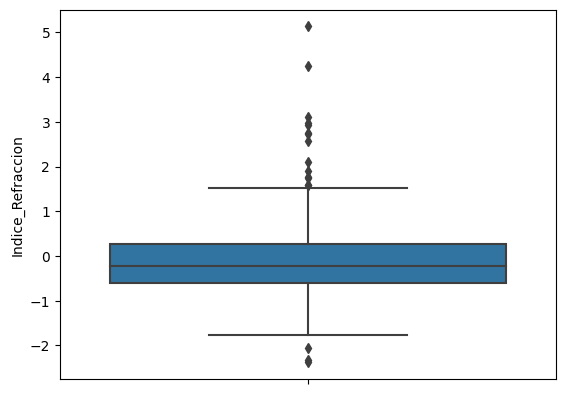

In [36]:
#Datos escalados
sns.boxplot(y=standard['Indice_Refraccion'])

In [37]:
#Funcion para determinar outliers
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper

lmin,lmax = find_boundaries(data['Indice_Refraccion'])
outliers = np.where(data['Indice_Refraccion'] > lmax, True,np.where(data['Indice_Refraccion'] < lmin, True, False))
outliers_df = data.loc[outliers, 'Indice_Refraccion']
outliers_df.head()

47     1.52667
50     1.52320
56     1.51215
103    1.52725
104    1.52410
Name: Indice_Refraccion, dtype: float64

#### Tranformación de datos atípicos
Si los datos atípicos son importantes y no es posible descartarlos, entonces 
es posible hacer una transformación de los datos para que se encuentren en un espacio con escalas similares.

Una transformación que se puede hacer es utilizar una función que mitigue la asimetría. 

**¿Escalar o quitar datos atípicos primero?**

Depende.... pero se recomienda primero quitar los outliers y luego escalar los datos. 

### Datos Nulos

Un dato nulo se refiere a la ausencia de un valor o valores en al menos una de las variables.
El origen de estos valores pueden ser distintos (errores de captura, censura, funcionamiento del fenómeno, etc.), pero hay que tratar de identificarlas para poder realizar el tratamiento correcto.

Si los datos no pueden ser eliminados y es necesario sustituirlos para poder procesarlos con algoritmos sensibles a la falta de datos.
Dentro de los criterios comúnmente usados para sustituir los valores nulos se encuentran.

◦ Sustitución por una constante

◦ Sustitución por una etiqueta

◦ Sustitución por la media

◦ Sustitución por la mediana

◦ Sustitución por el más frecuente

In [38]:
#Insertar datos nulos (10%)
data_nulos = data.mask(np.random.random(data.shape) < .1)

In [39]:
#Contar datos nulos en nuevo dataset
pd.DataFrame(data_nulos.isnull().sum(), columns=['Valores_Nulos'])

,Valores_Nulos
ID,21
Indice_Refraccion,18
Na,21
Mg,27
Al,15
Si,22
K,19
Ca,20
Ba,25
Fe,21


In [40]:
#Imputar datos nulos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=99)
imputer = SimpleImputer(strategy='constant', fill_value='Missing')
imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(data_nulos)
imputer.statistics_ # revisar los valores por los que remplazará
data_nulos_imputados = imputer.transform(data_nulos)

In [41]:
data_nulos_imputados = pd.DataFrame(data_nulos_imputados, columns=data.columns)
pd.DataFrame(data_nulos_imputados.isnull().sum(), columns=['Valores_Nulos'])

,Valores_Nulos
ID,0
Indice_Refraccion,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


### Datos Imbalanceados

El problema de los datos imbalanceados es que al predecir datos se tiene una gran exactitud prediciendo la clase mayoritaria, pero falla en capturar la clase minoritaria, que suele ser el objetivo de crear el modelo en primer lugar.


In [42]:
#Importar datos
fraud = pd.read_csv('fraud_dataset.csv')

In [43]:
fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
fraud.shape

(284807, 31)

In [45]:
#¿Cuántos datos son fraude?
fraud.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

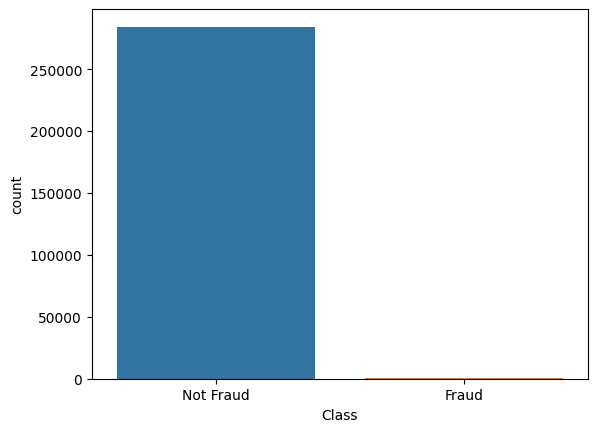

In [46]:
#Graficar fraude vs no fraude
g = sns.countplot(x=fraud['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

¿Qué pasa si hago predicciones con los datos así como están?

- Para todas esas transacciones que no son fraude, se va a tener una exactitud del 100%
- Para esas transacciones que son fraudalentas, se tendría una exactitud del 0%
- La exactitud en general sería alta simplemente porque la mayoría de las transacciones no son fraudulentas (no porque su modelo sea bueno).


#### Técnicas de remuestreo

Consiste en eliminar muestras de la clase mayoritaria (submuestreo) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo).



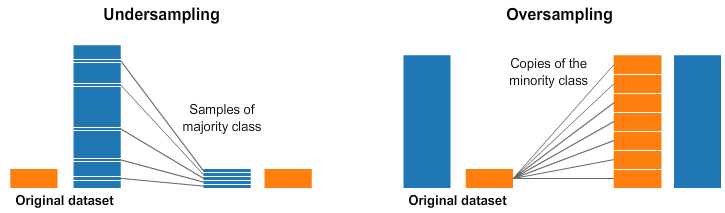

In [47]:
from IPython.display import Image
Image(filename='resampling.png')

In [48]:
#Haciendo una Regresión Logística con datos imbalanceados
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

x = fraud.iloc[:, :-1]
y = fraud.iloc[:, -1]

#Creación de la regresión 
model =  LogisticRegression(max_iter = 500)
model.fit(x, y)
y_predict = model.predict(x)
accuracy_score(y_predict, y)

0.9991397683343457

In [49]:
#conteo de clases
class_count_0, class_count_1 = fraud['Class'].value_counts()

#separamos las clases
class_0 = fraud[fraud['Class'] == 0]
class_1 = fraud[fraud['Class'] == 1]

##### Balancear datos con la librería "imblearn"

Se han propuesto varias técnicas de remuestreo más sofisticadas.

Por ejemplo, para el **submuestreo** podemos agrupar los registros de la clase mayoritaria y realizar el submuestreo eliminando registros de cada grupo, buscando así preservar la información. En el **sobremuestreo**, en lugar de crear copias exactas de los registros la clase minoritaria, podemos introducir pequeñas variaciones en esas copias, creando muestras sintéticas más diversas.


In [50]:
#pip install delayed
#pip install imblearn
#pip install collections
import delayed
import imblearn
from collections import Counter

In [51]:
#submuestreo
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(x, y)

print('Dimension de los datos originales:', Counter(y))
print('Dimension de los datos submuestreados', Counter(y_rus))

Dimension de los datos originales: Counter({0: 284315, 1: 492})
Dimension de los datos submuestreados Counter({0: 492, 1: 492})


In [52]:
#Sobremuestreo
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)

print('Dimension de los datos originales:', Counter(y))
print('Dimension de los datos sobremuestreados', Counter(y_ros))

Dimension de los datos originales: Counter({0: 284315, 1: 492})
Dimension de los datos sobremuestreados Counter({0: 284315, 1: 284315})


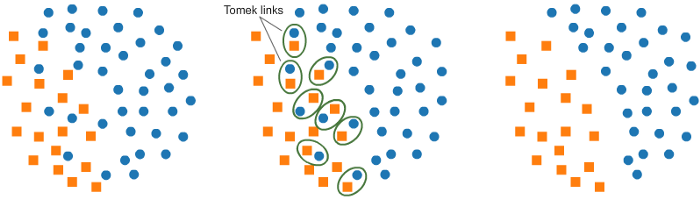

In [53]:
#Submuestreo Tomek links
from IPython.display import Image
Image(filename='Tomek.png')

In [54]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

In [55]:
#ajustando
x_tl, y_tl = tl.fit_resample(x, y)


print('Dimension de los datos originales:', Counter(y))
print('Dimension de los datos submuestreados', Counter(y_tl))

Dimension de los datos originales: Counter({0: 284315, 1: 492})
Dimension de los datos submuestreados Counter({0: 284244, 1: 492})


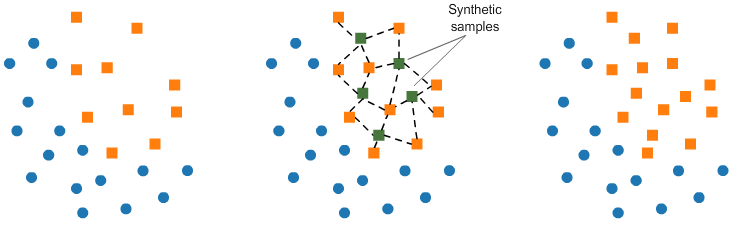

In [56]:
#Sobremuestreo Synthetic Minority Oversampling Technique (SMOTE)
from IPython.display import Image
Image(filename='SMOTE.png')

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#Ajustando
x_smote, y_smote = smote.fit_resample(x, y)

print('Dimension de los datos originales:', Counter(y))
print('Dimension de los datos submuestreados', Counter(y_smote))

Dimension de los datos originales: Counter({0: 284315, 1: 492})
Dimension de los datos submuestreados Counter({0: 284315, 1: 284315})


![ChessUrl](https://miro.medium.com/max/400/1*z6-XWtRlCDKciBd3eS4PzQ.gif "end")

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Sara E. Rodríguez.
</footer>